In [1]:
import pandas as pd
import geopandas as geopd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
import ast
def read_long(x):
    x = ast.literal_eval(x)
    return x['coordinates'][0]

In [3]:
def read_lat(x):
    x = ast.literal_eval(x)
    return x['coordinates'][1]

In [4]:
labeled_tweets = pd.read_json("Data/turkish_tweets_labels_protest_violence_predicted_20_08_2018.json")

In [5]:
len(labeled_tweets)

1060715

In [6]:
labeled_tweets.columns

Index(['id', 'created_at', 'text', 'coordinates', 'place', 'user',
       'proccd_text', 'protest', 'non_pro_prob', 'pro_prob', 'violence',
       'non_vio_prob', 'vio_prob'],
      dtype='object')

In [7]:
geo_tagged_tweets = labeled_tweets[labeled_tweets["coordinates"].isna() == False]

In [8]:
len(geo_tagged_tweets)

20594

In [9]:
geo_tagged_tweets["lat"] = geo_tagged_tweets["coordinates"].apply(lambda x: read_lat(x))

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
geo_tagged_tweets["long"] = geo_tagged_tweets["coordinates"].apply(lambda x: read_long(x))

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
geo_tagged_tweets.columns

Index(['id', 'created_at', 'text', 'coordinates', 'place', 'user',
       'proccd_text', 'protest', 'non_pro_prob', 'pro_prob', 'violence',
       'non_vio_prob', 'vio_prob', 'lat', 'long'],
      dtype='object')

In [16]:
len(geo_tagged_tweets)

20594

In [12]:
#create Point type for the inicdents in GEDELt incidents of interest
events_points = geo_tagged_tweets[["long","lat"]].apply(lambda x: Point(x['long'], x['lat']), axis = 1)

In [17]:
geo_tagged_tweets['points'] = events_points

/home/fatma/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
geo_tagged_tweets.to_csv("Data/labeled_geo_tagged_tweets.csv")

In [20]:
len(pd.read_csv("Data/labeled_geo_tagged_tweets.csv"))

20594

In [22]:
geo_tagged_tweets_points = geopd.GeoDataFrame(geo_tagged_tweets, geometry='points')

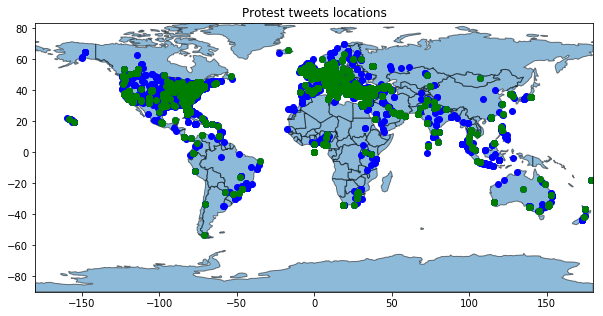

In [31]:
world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))
minx, miny, maxx, maxy = world.total_bounds
ax = world.plot(figsize=(10, 10),edgecolor='black', alpha =0.5)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
geo_tagged_tweets_points[geo_tagged_tweets_points["protest"] == 1].plot(ax=ax, color='green')
plt.title("Protest tweets locations")
plt.show()

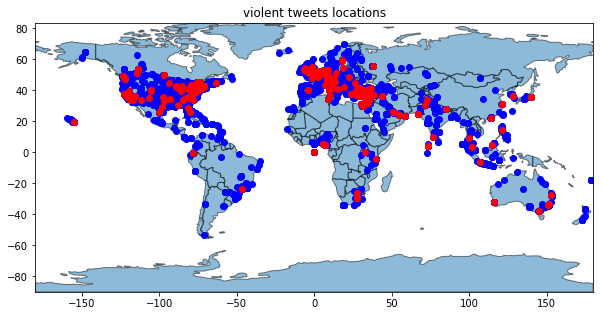

In [33]:
world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))
minx, miny, maxx, maxy = world.total_bounds
ax = world.plot(figsize=(10, 10),edgecolor='black', alpha =0.5)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
geo_tagged_tweets_points[geo_tagged_tweets_points["violence"] == 1].plot(ax=ax, color='red')
plt.title("violent tweets locations")
plt.show()

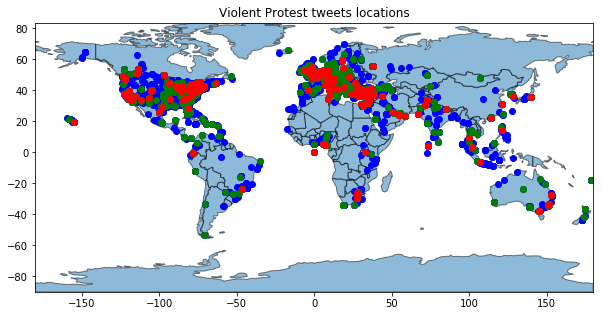

In [34]:
world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))
minx, miny, maxx, maxy = world.total_bounds
ax = world.plot(figsize=(10, 10),edgecolor='black', alpha =0.5)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
protest_tweets = geo_tagged_tweets_points[geo_tagged_tweets_points["protest"] == 1]
protest_tweets.plot(ax=ax, color='green')
protest_tweets[protest_tweets["violence"] == 1].plot(ax=ax, color='red')
plt.title("Violent Protest tweets locations")
plt.show()

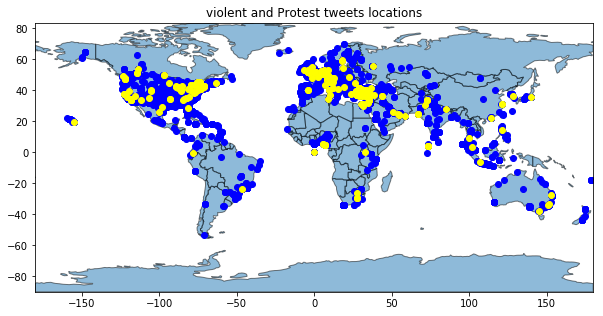

In [36]:
world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))
minx, miny, maxx, maxy = world.total_bounds
ax = world.plot(figsize=(10, 10),edgecolor='black', alpha =0.5)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
protest_violent_tweets = geo_tagged_tweets_points[(geo_tagged_tweets_points["protest"] == 1) & (geo_tagged_tweets_points["violence"] == 1)]
protest_violent_tweets.plot(ax=ax, color='yellow')

plt.title("violent and Protest tweets locations")
plt.show()

In [37]:
turkey_shp = geopd.read_file("Data/istanbul_turkey.imposm-shapefiles/istanbul_turkey_osm_admin.shp")

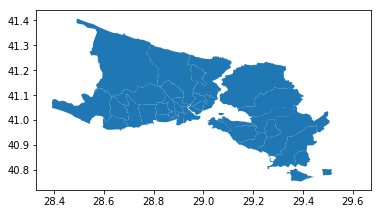

In [38]:
turkey_shp.plot()

In [39]:
minx, miny, maxx, maxy = turkey_shp.total_bounds

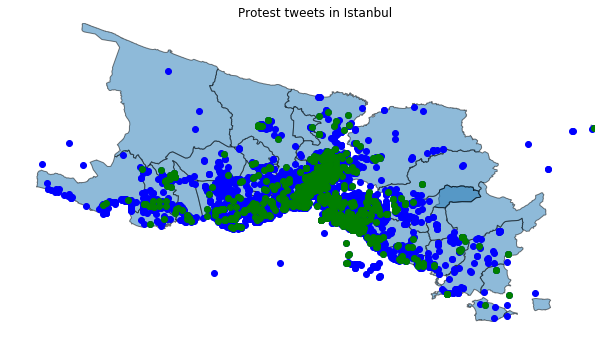

In [40]:
ax = turkey_shp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
geo_tagged_tweets_points[geo_tagged_tweets_points["protest"] == 1].plot(ax=ax, color='green')
ax.set_axis_off()
plt.title("Protest tweets in Istanbul")
plt.show()

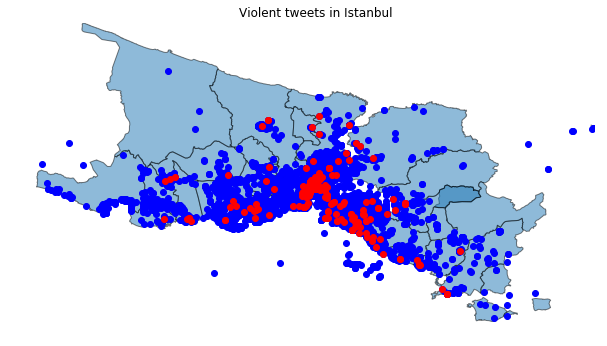

In [41]:
ax = turkey_shp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
geo_tagged_tweets_points[geo_tagged_tweets_points["violence"] == 1].plot(ax=ax, color='red')
ax.set_axis_off()
plt.title("Violent tweets in Istanbul")
plt.show()

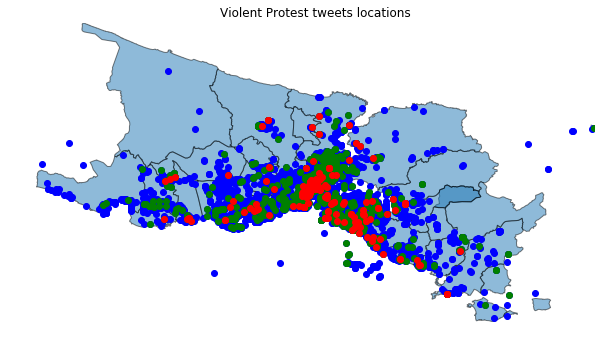

In [45]:
ax = turkey_shp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
protest_tweets = geo_tagged_tweets_points[geo_tagged_tweets_points["protest"] == 1]
protest_tweets.plot(ax=ax, color='green')
protest_tweets[protest_tweets["violence"] == 1].plot(ax=ax, color='red')
plt.title("Violent Protest tweets locations")
ax.set_axis_off()
plt.show()

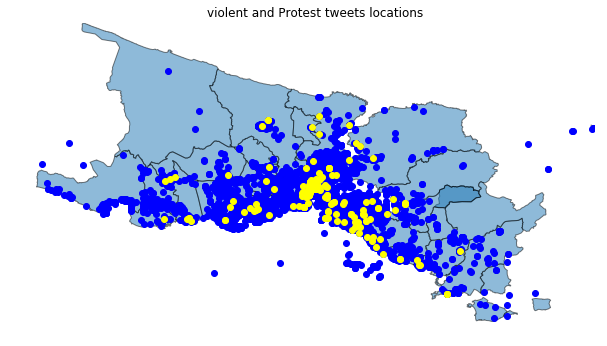

In [43]:
ax = turkey_shp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
protest_violent_tweets = geo_tagged_tweets_points[(geo_tagged_tweets_points["protest"] == 1) & (geo_tagged_tweets_points["violence"] == 1)]
protest_violent_tweets.plot(ax=ax, color='yellow')
ax.set_axis_off()
plt.title("violent and Protest tweets locations")
plt.show()

In [46]:
turkey_shp[turkey_shp["id"] == 32].total_bounds

array([28.93901184, 41.02154715, 28.99579169, 41.06578373])

In [47]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds

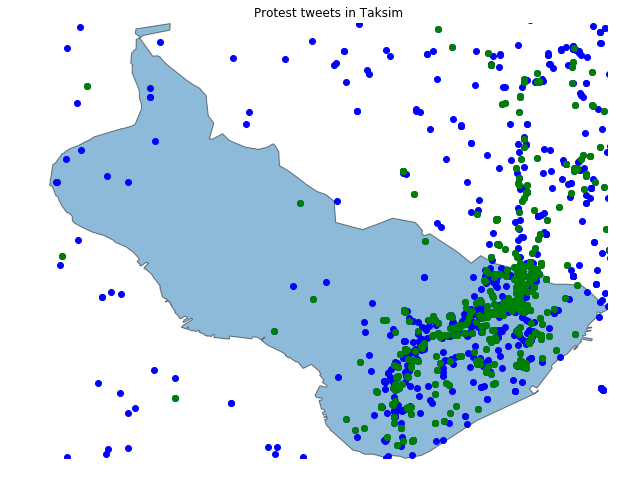

In [48]:
ax = turkey_shp[turkey_shp["id"] == 32].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
geo_tagged_tweets_points.plot(ax=ax, color='blue')
geo_tagged_tweets_points[geo_tagged_tweets_points["protest"] == 1].plot(ax=ax, color='green')
ax.set_axis_off()
plt.title("Protest tweets in Taksim")
plt.show()

In [ ]:
taksim.geometry

In [49]:
taksim = turkey_shp[turkey_shp["id"] == 32]

In [50]:
geo_tagged_tweets_points.crs = taksim.crs
taksim_tweets = geopd.sjoin(taksim, geo_tagged_tweets_points, how='inner', op='intersects')

In [51]:
len(taksim_tweets)

910

In [52]:
taksim_tweets.to_csv("Data/tweets_merged_within_taksim_admin.csv")

In [54]:
len(pd.read_csv("Data/tweets_merged_within_taksim_admin.csv"))

910

In [55]:
taksim_tweets_points = geo_tagged_tweets_points[geo_tagged_tweets_points.id.isin(taksim_tweets.id_right.values)]

In [56]:
taksim_tweets_points.to_csv("Data/taksim_tweets_points.csv")

In [57]:
len(taksim_tweets_points)

910

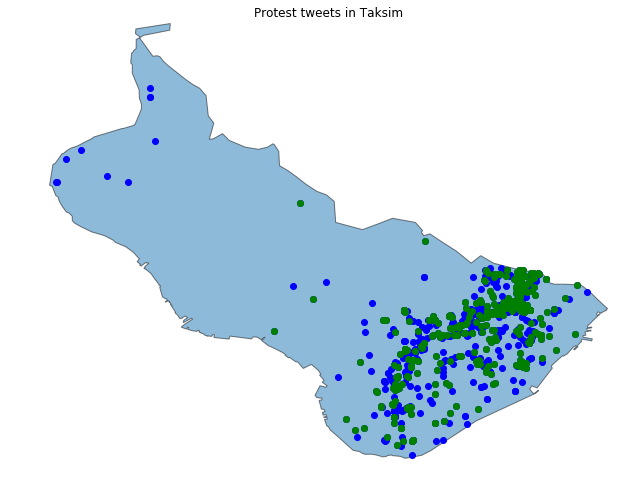

In [59]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds
ax = turkey_shp[turkey_shp["id"] == 32].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
taksim_tweets_points.plot(ax=ax, color='blue', alpha=1)
taksim_tweets_points[taksim_tweets_points["protest"] == 1].plot(ax=ax, color='green')
ax.set_axis_off()
plt.title("Protest tweets in Taksim")
plt.show()

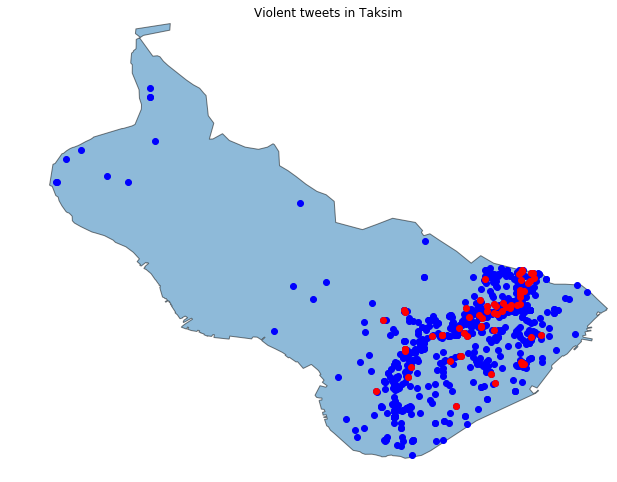

In [60]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds
ax = turkey_shp[turkey_shp["id"] == 32].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
taksim_tweets_points.plot(ax=ax, color='blue', alpha=1)
taksim_tweets_points[taksim_tweets_points["violence"] == 1].plot(ax=ax, color='red')
ax.set_axis_off()
plt.title("Violent tweets in Taksim")
plt.show()

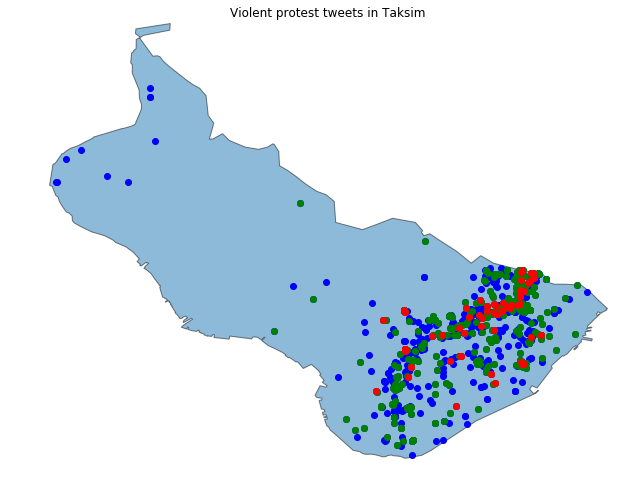

In [61]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds
ax = turkey_shp[turkey_shp["id"] == 32].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
taksim_tweets_points.plot(ax=ax, color='blue', alpha=1)
protest_tweets = taksim_tweets_points[taksim_tweets_points["protest"] == 1]
protest_tweets.plot(ax=ax, color='green')
protest_tweets[protest_tweets["violence"] == 1].plot(ax=ax, color='red')
ax.set_axis_off()
plt.title("Violent protest tweets in Taksim")
plt.show()

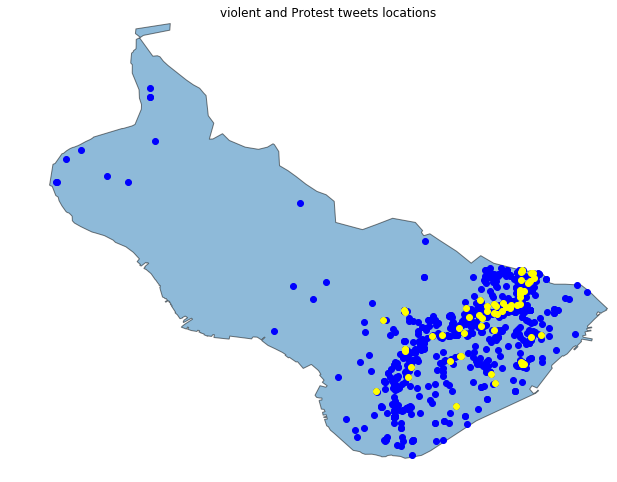

In [62]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds
ax = turkey_shp[turkey_shp["id"] == 32].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
taksim_tweets_points.plot(ax=ax, color='blue', alpha=1)
protest_violent_tweets = taksim_tweets_points[(taksim_tweets_points["protest"] == 1) & (taksim_tweets_points["violence"] == 1)]
protest_violent_tweets.plot(ax=ax, color='yellow')
ax.set_axis_off()
plt.title("violent and Protest tweets locations")

plt.show()